In [ ]:
 
import json, sys, random
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import sgd_experimental
import keras.callbacks

In [ ]:
from PIL import Image, ImageDraw 

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
f = open(r'/content/drive/My Drive/ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(f)
f.close()

In [ ]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [ ]:
input_data.shape

(4000, 19200)

In [ ]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [ ]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

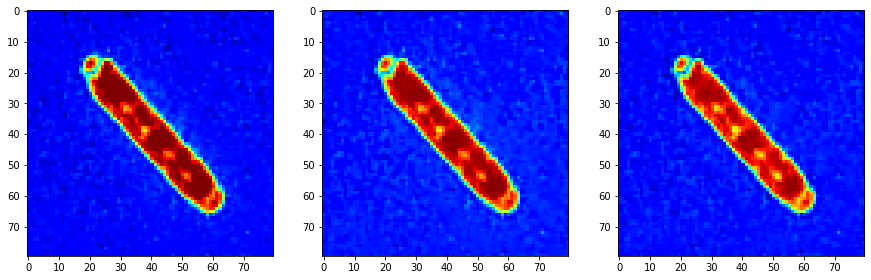

In [ ]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

In [ ]:
output_data.shape

(4000,)

In [ ]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
np.bincount(output_data)

array([3000, 1000])

In [ ]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [ ]:
# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

In [ ]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [ ]:
# normalization
X_train = X_train / 255

In [ ]:
np.random.seed(42)

In [ ]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
# optimization setup

sgd = sgd_experimental.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=230,
    validation_split=0.5,
    shuffle=True,
    verbose=2)

Epoch 1/230
63/63 - 15s - loss: 0.5249 - accuracy: 0.7560 - val_loss: 0.4494 - val_accuracy: 0.8585 - 15s/epoch - 233ms/step
Epoch 2/230
63/63 - 1s - loss: 0.3435 - accuracy: 0.8530 - val_loss: 0.2524 - val_accuracy: 0.9010 - 840ms/epoch - 13ms/step
Epoch 3/230
63/63 - 1s - loss: 0.2317 - accuracy: 0.9050 - val_loss: 0.2666 - val_accuracy: 0.8910 - 811ms/epoch - 13ms/step
Epoch 4/230
63/63 - 1s - loss: 0.2117 - accuracy: 0.9110 - val_loss: 0.2106 - val_accuracy: 0.9250 - 813ms/epoch - 13ms/step
Epoch 5/230
63/63 - 1s - loss: 0.1923 - accuracy: 0.9140 - val_loss: 0.1415 - val_accuracy: 0.9445 - 770ms/epoch - 12ms/step
Epoch 6/230
63/63 - 1s - loss: 0.1711 - accuracy: 0.9285 - val_loss: 0.1475 - val_accuracy: 0.9500 - 779ms/epoch - 12ms/step
Epoch 7/230
63/63 - 1s - loss: 0.1658 - accuracy: 0.9335 - val_loss: 0.1454 - val_accuracy: 0.9440 - 773ms/epoch - 12ms/step
Epoch 8/230
63/63 - 1s - loss: 0.1313 - accuracy: 0.9450 - val_loss: 0.1090 - val_accuracy: 0.9620 - 808ms/epoch - 13ms/step


In [ ]:
image = Image.open('/content/drive/My Drive/ships-in-satellite-imagery/scenes/scenes/sfbay_1.png')
pix = image.load()

In [ ]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]


In [ ]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])


In [ ]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)


In [ ]:
picture_tensor.shape

(1777, 2825, 3)

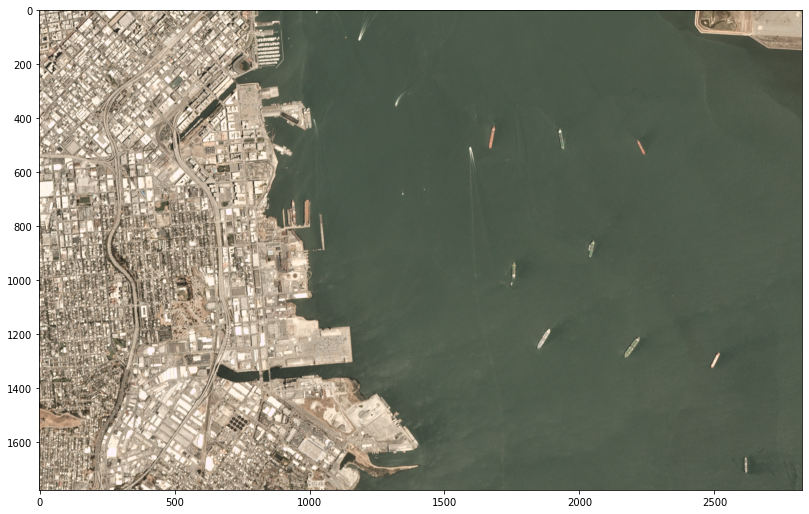

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [ ]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [ ]:
picture_tensor.shape

(3, 1777, 2825)

In [ ]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [ ]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result


In [ ]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:810 Y:10  [[0.02473459 0.97526544]]


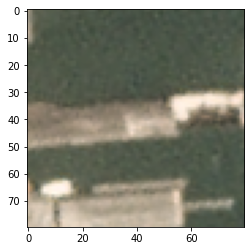

X:720 Y:190  [[0.04750577 0.9524942 ]]


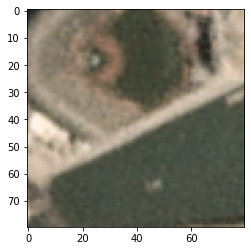

X:940 Y:320  [[0.02190604 0.9780939 ]]


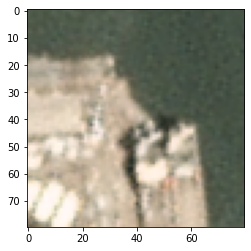

X:1640 Y:420  [[0.05877654 0.94122344]]


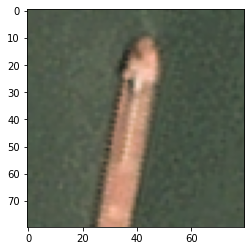

X:1890 Y:420  [[0.00742549 0.9925746 ]]


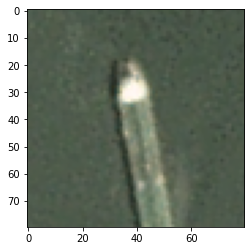

X:2190 Y:470  [[6.2551126e-06 9.9999380e-01]]


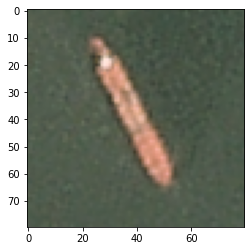

X:950 Y:690  [[0.00277655 0.9972235 ]]


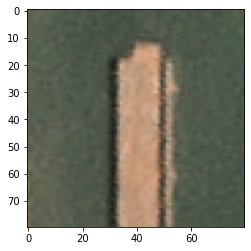

X:2390 Y:830  

In [ ]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [ ]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [ ]:
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

In [ ]:

plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()


